In [25]:
import pandas as pd 
import numpy as np 
import json
import http.client
#api stuff
conn = http.client.HTTPSConnection("twinword-sentiment-analysis.p.rapidapi.com")
headers = {
    'x-rapidapi-key': "738964bbbemsh589575de604beaep123452jsn73e2e1faafe8",
    'x-rapidapi-host': "twinword-sentiment-analysis.p.rapidapi.com"
}

#read entire csv
df = pd.read_csv("fullSample_FirstVignettes.csv")
#create headings text
cheadings = ["S1-FR_" + str(i) for i in range(4, 9)]
#get relevent headings
data = df[cheadings]
rows = data.iloc[[i for i in range(0, len(data))]].to_numpy()
#sentiment analysis
vignette_sentiments = []
for i in range(0, len(data)):
    row = rows[i]
    #seperate words with '%20'
    textstem = "/analyze/?text="
    ind_sentiments = []
    for response in row:
        req = ""
        words = response.split(" ")
        for word in words:
            req += word + "%20"
        text = textstem + req
        conn.request("GET", text , headers=headers)
        res = conn.getresponse()
        data = res.read()
        data = json.loads(data)
        ind_sentiments.append(data.get("score"))
    vignette_sentiments.append(ind_sentiments)

In [29]:
print(vignette_sentiments)
qavgs = [0]*5
for vign in vignette_sentiments:
    for i in range(0, len(vign)):
        qavgs[i] += vign[i]
for i in range(0, len(qavgs)):
    qavgs[i] /= len(vignette_sentiments)
print(qavgs)

[[0.561912573, -0.25306306733333334, -0.127496795, 0.10025308, -0.2192225845], [-0.096144741, -0.67064707, -0.14538228666666667, 0, 0.467771937], [-0.13949233533333336, -0.26819997, 0.11423609700000001, -0.82767436, 0.137132655], [-0.096144741, 0.200935065, 0.467771937, 0, 0.3405395105], [-0.26819997, 0.16547490520000002, 0, 0.15004457, 0.117922934], [-0.064779876, -0.02846300399999996, 0.027957493, 0.137689844, -0.12720954933333337], [0.200935065, 0.381423819, 0.13462711633333335, -0.43810137650000003, -0.0028977286666666733], [0, -0.05802673, -0.2892217276666667, -0.67064707, 0.3892803045], [-0.024036469999999994, -0.0055922540000000005, 0.359558546, 0.16530903514285714, -0.67064707], [0.10668865624999999, 0.652660016, 0.561912573, -0.319696172, -0.379623565], [0.18581359800000002, -0.022885361999999992, -0.071533022, 0.060329786999999996, -0.625], [0.05477094866666666, 0.025852136999999997, 0.23668392749999997, 0.03031782375, 0.2023093875], [0.125907405, -0.127496795, 0.196563830499

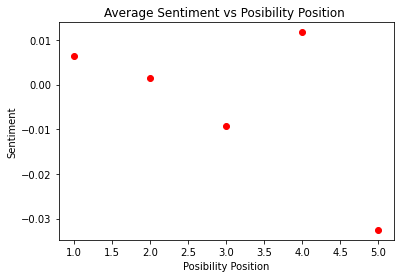

In [38]:
import matplotlib.pyplot as plt
nums = [i for i in range(1, len(qavgs)+1)]
plt.scatter(nums, qavgs, color="r")
plt.title("Average Sentiment vs Posibility Position ")
plt.xlabel("Posibility Position")
plt.ylabel("Sentiment")
plt.show()

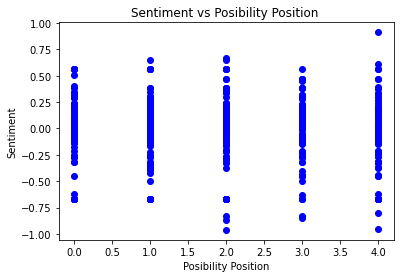

In [40]:
nums = []
sentiments = []
for vign in vignette_sentiments:
    for i in range(0, len(vign)):
        sentiments.append(vign[i])
        nums.append(i)
plt.scatter(nums, sentiments, color="b")
plt.title("Sentiment vs Posibility Position ")
plt.xlabel("Posibility Position")
plt.ylabel("Sentiment")
plt.show()

In [ ]:
#training the sentiment model 

